# Aula Prática 7 (guião)
### Semana de 23 a 27 de Outubro de 2022
### José Carlos Ramalho e Luís Cunha
### Sinopsis:
Algoritmos e modelação de problemas com armazenamento em memória secundária.

### Aquecimento: Calcula quantos números inteiros entre 1 e 10000 são múltiplos de 23 e devolve esse número (um múltiplo de 23 é um número que tem 23 como divisor).

```
def multiplos23():
    ... 
    return ... 
```

In [1]:
def multiplos23():
    res = []
    for n in range (1, 10001):
        if n % 23 == 0:
            res.append(n)
    return len(res)

print(multiplos23())

#def multiplos23():
    #i = 23
    #res = 0 
    #while i <= 10000:
        #i= i + 23
        #res = res + 1
    #return res

#print (multiplos23())

434


### Exercício 1: Considere os seguintes comentários que definem um modelo para guardar os registos de temperatura e precipitação ao longo de vários dias, materializado na variável tabMeteo1:

In [2]:
# TabMeteo = [(Data,TempMin,TempMax,Precipitacao)]
    # Data = (Int,Int,Int)
    # TempMin = Float
    # TempMax = Float
    # Precipitacao = Float

tabMeteo1 = [((2022,1,20), 2, 16, 0),((2022,1,21), 1, 13, 0.2)]

### 1.a) Calcula a temperatura média de cada dia, dando como resultado uma lista de pares: [(data, temperaturaMédia)]:

``` 
def medias(tabMeteo):
    ... 
    return ... 
```

In [12]:
def medias(tabMeteo):
    res = []
    for data, tmin, tmax, prec in tabMeteo:
        temperaturaMédia = (tmin + tmax) / 2
        res.append((data, temperaturaMédia))
    return res

print(medias(tabMeteo1))

[((2022, 1, 20), 9.0), ((2022, 1, 21), 7.0)]


### 1.b) Define uma função para guardar uma tabela meteorológica num ficheiro de texto.

In [3]:
def guardaTabMeteo(t, fnome):
    file = open(fnome, "w")

    for data, tmin, tmax, prec in t:
        registo = str(data[0]) + " - " + str(data[1]) + " - " + str(data[2])
        registo = registo + " ; " + str(tmin) + " ; " + str(tmax) + " ; " + str(prec) + "\n"
        
        file.write(registo)
    file.close()


guardaTabMeteo(tabMeteo1, "metereologia.txt")

### 1.c) Define uma função para carregar uma tabela meteorológica de um ficheiro de texto.

In [10]:
# line.split() retorna uma lista de strings que foram separadas pelo elemento que metemos dentro dos ()
# line.strip() strip - corta, com o () corta espaços no fim e no início, tal como parágrafos, ...
    
def carregaTabMeteo(fnome):
    file = open(fnome, "r")
    res = []
    for line in file:
        line = line.strip()
        campos = line.split(";")
        data = campos[0].split("-")
        data = (int(data[0]), int(data[1]), int(data[2]))
        tmin = float(campos[1])
        tmax = float(campos[2])
        prec = float(campos[3])

        res.append((data, tmin, tmax, prec))
        
    file.close()
    return res


print(carregaTabMeteo("metereologia.txt"))

[((2022, 1, 20), 2.0, 16.0, 0.0), ((2022, 1, 21), 1.0, 13.0, 0.2)]


### 1.d) Calcula a temperatura mínima mais baixa registada na tabela, dando como resultado esse valor:

``` 
def minMin(tabMeteo):
    ... 
    return ... 
```

In [12]:
def minMin(tabMeteo):
    minimo = tabMeteo[0][1]

    for _ , tmin, * _ in tabMeteo[1:]:
        if tmin < minimo:
            minimo = tmin
    return minimo

print(minMin(tabMeteo1))

1


### 1.e) Calcula a amplitude térmica (diferença entre a temperatura máxima e a temperatura mínima) de cada dia, dando como resultado uma lista de pares: [(data, amplitude)]

``` 
def amplTerm(tabMeteo):
    ... 
    return ... 
```

In [3]:
def amplTerm(tabMeteo):
    res = []
    for data, tmin, tmax, prec in tabMeteo:
        amplitudetermica = tmax - tmin
        res.append((data, amplitudetermica))
    return res

print(amplTerm(tabMeteo1))

[((2022, 1, 20), 14), ((2022, 1, 21), 12)]


### 1.f) Calcula o dia em que a precipitação registada teve o seu valor máximo e indica esse valor, dando como resultado o par (data, valor):

```
def maxChuva(tabMeteo):
    ... 
    return ... 
```

In [4]:
def maxChuva(tabMeteo):
    res = []
    precmaxima = tabMeteo[0][3]
    for data, tmin, tmax, prec in tabMeteo[1:]:
        if prec > precmaxima:
            precmaxima = prec
            res.append((data, precmaxima))

    return res

print(maxChuva(tabMeteo1))

[((2022, 1, 21), 0.2)]


### 1.g) Define uma função que recebe uma tabela meteorológica e um limite `p` e retorna uma lista de pares [(data, precipitação)] correspondente aos dias em que a precipitação foi superior a `p`.


In [5]:
def diasChuvosos(tabMeteo, p):
    res = []
    for data, tmin, tmax, prec in tabMeteo:
        if prec > p:
            res.append((data, prec))
    return res

diasChuvosos(tabMeteo1, 0.1)

[((2022, 1, 21), 0.2)]

### 1.h) Define uma função que recebe uma tabela meteorológica e um limite `p` e retorna o maior número consecutivo de dias com precipitação abaixo desse limite.

In [3]:
def maxPeriodoCalor(tabMeteo, p):
    dconsecutivos = 0
    maxdconsecutivos = 0

    for data,tmin,tmax,prec in tabMeteo:
        if prec < p:
            dconsecutivos = dconsecutivos + 1
            if dconsecutivos > maxdconsecutivos:
                maxdconsecutivos = dconsecutivos
        else:
            dconsecutivos = 0
    return maxdconsecutivos



tabMeteo2 = [((2022,1,20), 2, 16, 0),((2022,1,21), 1, 13, 0.2), ((2022,2,15), 1, 15, 1), ((2022,3,15), 1, 12, 0.1), ((2022,3,16), 0, 14, 0), ((2022,3,17), 1, 11, 0.2)]

maxPeriodoCalor(tabMeteo2, 0.3)

3

### 1.i) Define uma função que recebe uma tabela meteorológica e desenha os gráficos da temperatura mínima, máxima e de pluviosidade.

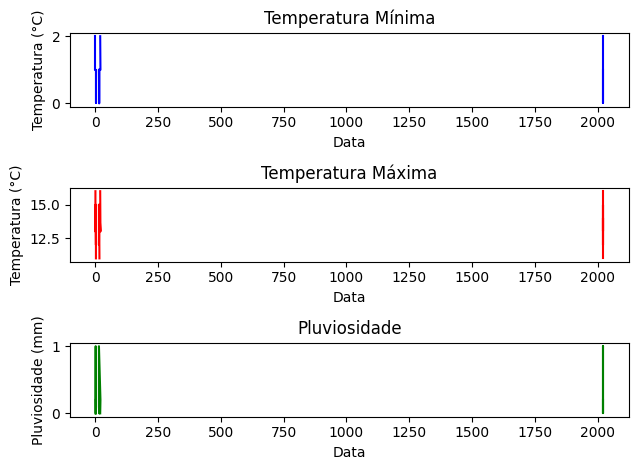

In [12]:
import matplotlib.pyplot as plt


def grafTabMeteo(tabMeteo):
    data = [meteo[0] for meteo in tabMeteo]
    tmin = [meteo[1] for meteo in tabMeteo]
    tmax = [meteo[2] for meteo in tabMeteo]
    prec = [meteo[3] for meteo in tabMeteo]

    # Gráfico da temperatura mínima
    plt.subplot(3, 1, 1)
    plt.plot(data, tmin, color="blue")
    plt.title("Temperatura Mínima")
    plt.xlabel("Data")
    plt.ylabel("Temperatura (°C)")

    # Gráfico da temperatura máxima
    plt.subplot(3, 1, 2)
    plt.plot(data, tmax, color='red')
    plt.title("Temperatura Máxima")
    plt.xlabel("Data")
    plt.ylabel("Temperatura (°C)")
    # Gráfico de pluviosidade
    plt.subplot(3, 1, 3)
    plt.plot(data, prec, color="green")
    plt.title("Pluviosidade")
    plt.xlabel("Data")
    plt.ylabel("Pluviosidade (mm)")

    plt.tight_layout()
    plt.show()


grafTabMeteo(tabMeteo2)

### 1.j) Coloca tudo numa aplicação externa ao notebook. 

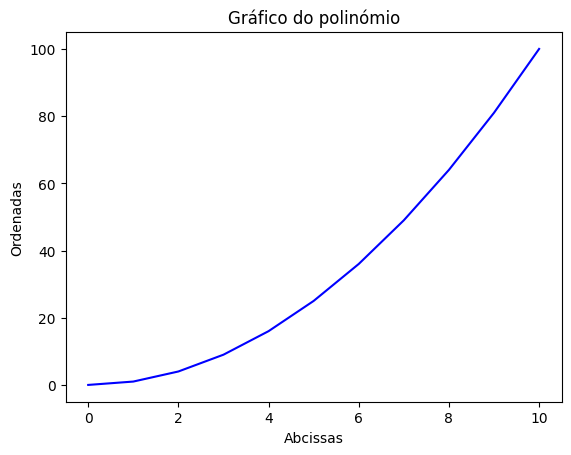

None


In [ ]:
#aquecimento do tpc 

def derivarPolinomio(p):
    derivada = [] 
    for c,g in p:
        if g !=0:
            g2 = g - 1 
            derivada.append((c*g, g2))
    return derivada

def somarPolinomios(p1,p2):
    soma = []
    i = 0
    j = 0
    while i < len(p1) and j < len(p2):
        c1, g1 = p1[i]
        c2, g2 = p2[j]

        if g1 == g2:
            soma.append((c1 + c2, g1))
            i = i + 1
            j = j + 1
        elif g1 > g2:
            soma.append((c1, g1))
            i = i + 1
        else:
            soma.append((c2, g2))
            j = j + 1

    while i < len(p1):
        c1, g1 = p1[i]
        soma.append((c1, g1))
        i = i + 1
    
    while j < len(p2):
        c2, g2 = p2[j]
        soma.append((c2, g2))
        j = j + 1

    return soma


import matplotlib.pyplot as plt

def pot(a,b):
    res = 1
    while b > 0:
        res = res * a
        b = b - 1 
    return res 
    
def calcPolinomio(p, x):
    res = 0
    for termo in p:
        c = termo[0]
        g = termo[1]
        res = res + c * pot(x, g)
    return res

def grafPolinomio(p):

    valores_x = []
    valores_y = []

    for x in range (0,11):
        valores_x.append(x)
        y = calcPolinomio(p,x)
        valores_y.append(y)

    plt.plot(valores_x, valores_y, color = "blue")
    

    plt.xlabel("Abcissas")
    plt.ylabel("Ordenadas")

    plt.title("Gráfico do polinómio")

    plt.show()

print(grafPolinomio(p4))



### TPC7: Construir uma aplicação para manipular polinómios

Depois da aula da semana passada, já tens algumas funções desenvolvidas que te irão ajudar a construir a aplicação que se descreve a seguir.

* Aquecimento: Instancia os seguintes exemplos num ficheiro de texto com o formato definido na última aula
    - `x^7 - 7x^4 + 5x^3 - 88`
    - `2x^2 + 17`
    - `7x^4 + 6x^3 - x^2 + 43`
    - `x^4`
    - `x^2`
    - `x^3`

* Desenvolve as seguintes funcionalidades que não foram trabalhadas na aula:
    1. Define uma função que dado um polinómio calcula a sua derivada;
    2. Define uma função que recebe dois polinómios `p1` e `p2` e calcula um novo polinómio correspondente à soma de `p1` e `p2`;
    3. Define uma função que recebe um polinómio e o desenha num gráfico.

* Num ficheiro Python, cria uma aplicação para manipular polinómios com as seguintes operações:
    1. Criar um polinómio interativamente;
    2. Ler uma lista de polinómios de um ficheiro;
    3. Listar polinómios: mostra numa tabela os polinómios carregados em memória, adicionando um número de ordem a cada um;
    4. Calcular o valor de um polinómio num ponto (usa o número de ordem para referenciar o polinómio);
    5. Listar polinómios com grau: à listagem anterior, acrescenta mais uma coluna com o grau;
    6. Maior grau: mostra o polinómio de maior grau e indica o seu número de ordem;
    7. Derivada: mostra uma tabela com os polinómios e as respetivas derivadas;
    8. Somar dois polinómios: indicando os seus números de ordem;
    9. Gerar um gráfico para o polinómio;
    10. Gravar num ficheiro os polinómios em memória;
    0. Sair da aplicação


In [22]:
p1 = [(1,7), (-7,4), (5,3), (88,0)]
p2 = [(2,2), (17,0)]
p2 = [(7,4), (6,3), (-1,2), (43,0)]
p3 = [(1,4)]
p4 = [(1,2)]
p5 = [(1,3)]

In [59]:
def guardarPolinomios(listap, fnome):
    file = open(fnome, "w")
    for p in listap:
        poli = []
        for termo in p:
            c, g = termo
            file.write((str(c) + " , " + str(g)) + " ; ") 
        file.write("\n")


listap = [p1, p2, p3, p4, p5]
guardarPolinomios(listap, "PolinómiosTPC.txt" )


In [ ]:
# funçao 1 ----------------- 

def criaPolinomio():
    resPol = []
    g = int(input("Qual o grau do polinómio: "))
    while g >= 0:
        c = int(input("Qual o coeficente para o grau " + str(g) + " :"))
        if c != 0:
            termo = (c, g)
            resPol.append(termo)
        g = g - 1

    return resPol 


# funçao 2 -----------------

def lePolinomio(fnome):
    res = []
    file = open(fnome)
    for linha in file:
        pol = []
        termos = linha.strip().split(";")
        for t in termos:
            monomio = t.split(",")
            if len(monomio) >= 2:
                c = monomio[0]
                g = monomio[1]
                pol.append((int(monomio[0]), int(monomio[1])))
        res.append(pol)
    file.close()
    print ("----------------------------------------------")
    return res


# funçao 3 -----------------

def tabelaPolinomio(fnome):
    ordem = 1
    file = open(fnome)
    print ("  Ordem      ||     Polinómio ")

    for linha in file:
        pol = []
        termos = linha.split(";") 
        for t in termos:
            res = ""
            monomio = t.split(",")
            if len(monomio) >= 2:
                c = monomio[0]
                g = monomio[1]
                if int(c) < 0:
                    res = res + str(c)
                else:
                    res = res + "+" + str(c)
                if int(c) != 0:
                    if g != 0:
                        res = res + "x^" + str(g) 
                pol.append(res)
        print ( "    " + str(ordem) + "        ||     " + ''.join(pol))
        ordem = ordem + 1
        print ("----------------------------------------------")
    file.close()


# funçao 4 -----------------

def pot(a,b):
    res = 1
    while b > 0:
        res = res * a
        b = b - 1 
    return res 
    

def calcPolinomio(fnome, x, ordem):
    polinomios = lePolinomio(fnome)
    if 0 <= ordem < len(polinomios):
        polinomioselcionado = polinomios[ordem-1]
        res = 0
        for termo in polinomioselcionado:
            coe, grau = termo
            res = res + coe * pot(x, grau)
        return res
    else:
        return "A ordem desejada não é válida no ficheiro"


#funçao 5 -----------------

def tabelagrauPolinomio(fnome):
    ordem = 1
    file = open(fnome)
    print ("  Ordem      ||     Grau      ||     Polinómio ")

    for linha in file:
        pol = []
        termos = linha.split(";") 
        grau = 0
        for t in termos:
            res = ""
            monomio = t.split(",")
            if len(monomio) >= 2:
                c = monomio[0]
                g = monomio[1]
                if int(c) < 0:
                    res = res + str(c)
                else:
                    res = res + "+" + str(c)
                if int(c) != 0:
                    if g != 0:
                        res = res + "x^" + str(g)
                        if int(g) > grau:
                            grau = int(g)
                pol.append(res)
        print ( "    " + str(ordem) + "        ||     " + str(grau) + "        ||     " + ''.join(pol))
        ordem = ordem + 1
        print ("----------------------------------------------")
    file.close()


# funçao 6 -----------------

def maiorgrauPolinomio(fnome):
    file = open (fnome)
    ordem = 1
    maiorgrau = 0
    polinomiomaiorgrau = None
    ordemdopolmaiorgrau = None
    for linha in file:
        termos = linha.strip().split(";")
        c,g = termos[0].split(",")
        grauprimtermo = int(g)
        if grauprimtermo > maiorgrau:
            maiorgrau = grauprimtermo
            polinomiomaiorgrau = linha.strip()
            ordemdopolmaiorgrau = ordem
        ordem = ordem + 1
    file.close()
    return "O polímómio de maior grau tem ordem " + str(ordemdopolmaiorgrau) + " e grau " + str(maiorgrau) + " sendo o polinómio: " + str(polinomiomaiorgrau)


# funçao 7 ----------------- 

def derivarPolinomio(p):
    derivada = [] 
    for termo in p:
        if len(termo) >= 2:
            c, g = termo
            g = int(g)
            if g != 0:
                g2 = g - 1 
                derivada.append((c*g, g2))
    return derivada

def tabelaDerivadas(fnome):
    file = open(fnome)
    print(" Polinómio      ||  Derivada   ")
    for linha in file:
        print(linha)
        termos  = linha.strip().split(";")
        print(termos)
        for t in termos:
            termo = termos[0].split(",")
            print(termo)
            d = derivarPolinomio(termo)
        polinomio = linha.strip()
    return str(polinomio) + "      ||  " + str(d)


# funçao 8 -----------------

def somarPolinomios(fnome, ordem1, ordem2):
    polinomios = lePolinomio(fnome)
    soma = []
    ordem = 1
    if 0 <= ordem1 <= len(polinomios) and 0 <= ordem2 <= len(polinomios):
        p1 = polinomios[ordem1 - 1]
        p2 = polinomios[ordem2 - 1] 
        i = 0
        j = 0
        if len(p1) and len(p2) >= 2:

            while i < len(p1) and j < len(p2):
                c1, g1 = p1[i]
                c2, g2 = p2[j]

                if g1 == g2:
                    soma.append((c1 + c2, g1))
                    i = i + 1
                    j = j + 1
                elif g1 > g2:
                    soma.append((c1, g1))
                    i = i + 1
                else:
                    soma.append((c2, g2))
                    j = j + 1

            while i < len(p1):
                c1, g1 = p1[i]
                soma.append((c1, g1))
                i = i + 1
            
            while j < len(p2):
                c2, g2 = p2[j]
                soma.append((c2, g2))
                j = j + 1

        return "A soma dos polinómios de ordens " + str(ordem1) + " e " + str(ordem2) + " é " + str(soma)
    else:
        return "As ordens desejadas não são válidas no ficheiro"
    
    
# funçao 9 -----------------

import matplotlib.pyplot as plt

def grafPolinomio(fnome, ordem):
    polinomios = lePolinomio(fnome)

    if 1 <= ordem <= len(polinomios):
        p = polinomios[ordem-1]

        valores_x = []
        valores_y = []

        for x in range (0,11):
            valores_x.append(x)
            y = calcPolinomio(p,x,ordem)
            valores_y.append(y)

        plt.plot(valores_x, valores_y, color = "blue")
        

        plt.xlabel("Abcissas")
        plt.ylabel("Ordenadas")

        plt.title("Gráfico do polinómio")

        plt.show()


# funçao 10 ----------------- 

def guardarPolinomios(listap, fnome):
    file = open(fnome, "w")
    for p in listap:
        poli = []
        for termo in p:
            c, g = termo
            file.write((str(c) + " , " + str(g)) + " ; ") 
        file.write("\n")


# MENU -----------------

def menu():
    print("""(1) Criar um polinómio;
    (2) Ler lista de polinómios;
    (3) Tabela de polinómios;
    (4) Calcular o polinómio num ponto;
    (5) Tabela de polinómios com grau;
    (6) Polinómio de maior grau;
    (7) Tabela das derivadas de polinómios;
    (8) Somar dois polinómios;
    (9) Gráfico de um polinómio;
    (10) Gravar os polinómios em ficheiro;
    (0) Sair""")


print(menu())
opc = int(input("Qual a opção que deseja?"))
while opc != 0:
    if opc == 1:
       criaPolinomio()
       print(menu())
       opc = int(input("Qual a opção que deseja?"))
    if opc == 2:
        print(lePolinomio("PolinómiosTPC.txt"))
        print(menu())
        opc = int(input("Qual a opção que deseja?"))
    if opc == 3:
        tabelaPolinomio("PolinómiosTPC.txt")
        print(menu())
        opc = int(input("Qual a opção que deseja?"))
    if opc== 4:
        x = int(input("Qual é o valor de x que deseja?"))
        ordem = int(input("Qual a ordem do polinómio que deseja?"))
        print(calcPolinomio("PolinómiosTPC.txt",x, ordem))
        print(menu())
        opc = int(input("Qual a opção que deseja?"))
    if opc == 5:
        tabelagrauPolinomio("PolinómiosTPC.txt")
        print(menu())
        opc = int(input("Qual a opção que deseja?"))
    if opc == 6:
        maiorgrauPolinomio("PolinómiosTPC.txt")
        print(menu())
        opc = int(input("Qual a opção que deseja?"))
    if opc == 7:
        tabelaDerivadas("PolinómiosTPC.txt")
        print(menu())
        opc = int(input("Qual a opção que deseja?"))
    if opc == 8:
       ordem1 = int(input("Qual é a ordem do primeiro polinómio?"))
       ordem2 = int(input("Qual é a ordem do segundo polinómio?"))
       somarPolinomios("PolinómiosTPC.txt", ordem1, ordem2)
       print(menu())
       opc = int(input("Qual a opção que deseja?"))
    if opc == 9:
       ordem = int(input("Qual a ordem do polinómio que deseja?"))
       grafPolinomio("PolinómiosTPC.txt", ordem) 
       print(menu())
       opc = int(input("Qual a opção que deseja?"))
    if opc == 10:
        guardarPolinomios("PolinómiosTPC.txt") 
        print(menu())   
        opc = int(input("Qual a opção que deseja?"))
if opc == 0:
    print("A aplicação terminou! Até à próxima!")


